In [46]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [47]:
# membaca data
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [48]:
# menghilangkan kolom yang tidak diperlukan
data = data.drop(["Delicassen","Detergents_Paper","Frozen","Fresh"], axis=1)
data.head()

,Channel,Region,Milk,Grocery
0,2,3,9656,7561
1,2,3,9810,9568
2,2,3,8808,7684
3,1,3,1196,4221
4,2,3,5410,7198


In [49]:
# menentukan variabel yang akan di klasterkan
data_x = data.iloc[:, 2:4]
data_x.head()

,Milk,Grocery
0,9656,7561
1,9810,9568
2,8808,7684
3,1196,4221
4,5410,7198


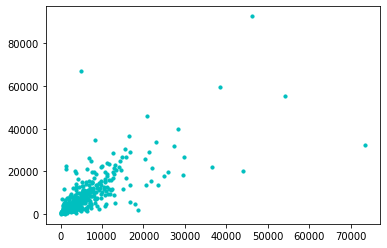

In [50]:
# memvisualkan pesebaran data
plt.scatter(data.Milk, data.Grocery, s=10, c='c', marker='o', alpha=1)
plt.show()

In [51]:
# mengubah variabel data frame menjadi array
x_array = np.array(data_x)
print(x_array)

[[ 9656  7561]
 [ 9810  9568]
 [ 8808  7684]
 [ 1196  4221]
 [ 5410  7198]
 [ 8259  5126]
 [ 3199  6975]
 [ 4956  9426]
 [ 3648  6192]
 [11093 18881]
 [ 5403 12974]
 [ 1124  4523]
 [12319 11757]
 [ 6208 14982]
 [ 9465 12091]
 [ 1114  3821]
 [ 8816 12121]
 [ 6157  2933]
 [ 6327 10099]
 [ 2495  9464]
 [ 4519  4602]
 [  871  2010]
 [ 1917  4469]
 [36423 22019]
 [ 9776 13792]
 [ 4230  7595]
 [  961  2861]
 [  803  3045]
 [20484 25957]
 [ 2100  2609]
 [ 3610 11107]
 [ 4339  3133]
 [ 1318  2886]
 [ 4786  7326]
 [ 1979  2262]
 [ 5491 11091]
 [ 4362  5428]
 [10556 12477]
 [15729 16709]
 [  555   902]
 [ 4332  4757]
 [ 3065  5956]
 [ 7555 14961]
 [11095 23998]
 [ 7027 10471]
 [22044 21531]
 [14069 21955]
 [54259 55571]
 [ 6152 10868]
 [21412 28921]
 [ 1095  1980]
 [ 4051  6996]
 [ 3916  5876]
 [10473 11532]
 [ 1449  1947]
 [ 3683  5005]
 [29892 26866]
 [ 9933 10487]
 [ 1970  1648]
 [ 5360  8040]
 [ 3045  7854]
 [38369 59598]
 [ 6245  6544]
 [11601 15775]
 [ 1227  3250]
 [20959 45828]
 [ 1534  7

In [52]:
# menstandarkan ukuran variabel
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[1.30727231e-01, 8.14641560e-02],
       [1.32824095e-01, 1.03096673e-01],
       [1.19180861e-01, 8.27899156e-02],
       [1.55358577e-02, 4.54638542e-02],
       [7.29136882e-02, 7.75515483e-02],
       [1.11705677e-01, 5.52184270e-02],
       [4.28087088e-02, 7.51479354e-02],
       [6.67320235e-02, 1.01566121e-01],
       [4.89222935e-02, 6.67083437e-02],
       [1.50293425e-01, 2.03477155e-01],
       [7.28183762e-02, 1.39808358e-01],
       [1.45555056e-02, 4.87189713e-02],
       [1.66986643e-01, 1.26690882e-01],
       [8.37792574e-02, 1.61451653e-01],
       [1.28126574e-01, 1.30290913e-01],
       [1.44193456e-02, 4.11524408e-02],
       [1.19289789e-01, 1.30614269e-01],
       [8.30848413e-02, 3.15811031e-02],
       [8.53995616e-02, 1.08820074e-01],
       [3.32230437e-02, 1.01975705e-01],
       [6.07818308e-02, 4.95704754e-02],
       [1.11106572e-02, 2.16325167e-02],
       [2.53529948e-02, 4.81369305e-02],
       [4.95186743e-01, 2.37300193e-01],
       [1.323611

In [53]:
# menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters=3, random_state=123)
#menentukan kluster dari data
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [54]:
# menampilkan pusat cluster
print(kmeans.cluster_centers_)

[[0.1491263  0.17362794]
 [0.03968164 0.04225051]
 [0.48427352 0.47382613]]


In [55]:
# menampilkan hasil cluster
print(kmeans.labels_)

# menambahkan kolom kluster dalam data frame data
data["kluster"] = kmeans.labels_
data

[0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 2 0 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 1 1 1 0 0 0 0 0 2 1 0 1 1 1 0 1 1 2 0 1 1 1 2 1 0 1 2 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 0 1 1 2 2 1 1 1 1 1 2 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 2 1
 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 2 1 1 0 0 0 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 2 1 0 0 1 1 1 1
 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1
 2 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1]


,Channel,Region,Milk,Grocery,kluster
0,2,3,9656,7561,0
1,2,3,9810,9568,0
2,2,3,8808,7684,1
3,1,3,1196,4221,1
4,2,3,5410,7198,1
...,...,...,...,...,...
435,1,3,12051,16027,0
436,1,3,1431,764,1
437,2,3,15488,30243,0
438,1,3,1981,2232,1


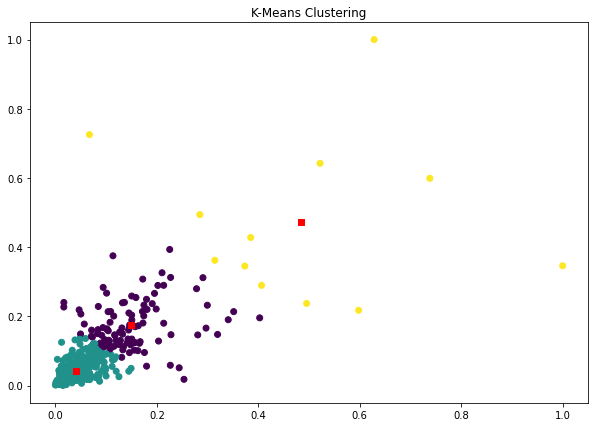

In [59]:
# memvisualkan hasil kluster
plt.figure(figsize=(10, 7)) 
output = plt.scatter(x_scaled[:,0], x_scaled[:,1],c=data.kluster, marker='o', alpha=1, )

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', alpha=1, marker='s');

plt.title("K-Means Clustering")

plt.show()